In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('poverty.csv')
df.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


x = Brth18to19

y = ViolCrime

In [3]:
x_mean = df['Brth18to19'].mean()
y_mean = df['ViolCrime'].mean()

In [4]:
x_difference = df['Brth18to19'].values - x_mean
y_difference = df['ViolCrime'].values - y_mean

In [5]:
x_difference_square = np.square(x_difference)
y_difference_square = np.square(y_difference)

In [6]:
x_difference_y_difference = x_difference * y_difference

In [7]:
gradient = np.sum(x_difference_y_difference) / np.sum(x_difference_square)
gradient

0.22441039625603429

In [8]:
y_intercept = y_mean - gradient * x_mean
y_intercept

-8.3070467734983104

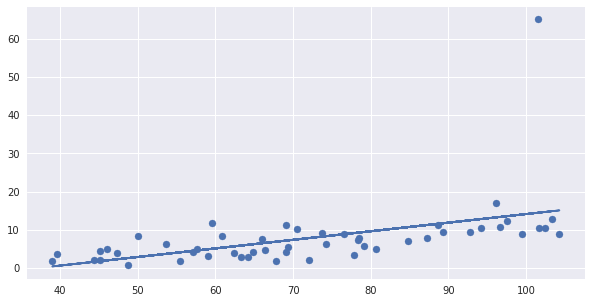

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(df['Brth18to19'].values, df['ViolCrime'].values)
plt.plot(df['Brth18to19'].values, df['Brth18to19'].values*gradient+y_intercept)
plt.show()

x1 = Brth15to17

x2 = Brth18to19

y = ViolCrime

In [10]:
x1_mean = df['Brth15to17'].mean()
x2_mean = df['Brth18to19'].mean()
y_mean = df['ViolCrime'].mean()

In [11]:
y_difference = df['ViolCrime'] - y_mean
x1_difference = df['Brth15to17'] - x1_mean
x2_difference = df['Brth18to19'] - x2_mean
y_difference_x1_difference = y_difference * x1_difference
y_difference_x2_difference = y_difference * x2_difference
x1_difference_square = np.square(x1_difference)
x2_difference_square = np.square(x2_difference)
x1_difference_x2_difference = x1_difference * x2_difference

z_mean = Ax1_mean + Bx2_mean + c

z_diff = Ax1_diff + Bx2_diff

z_diff_x1_diff = Ax1_diff^2 + Bx2_diff_x1_diff

z_diff_x2_diff = Ax1_diff_x2_diff + Bx2_diff^2

In [12]:
y_x1_x2_x2 = np.sum(y_difference_x1_difference) * np.sum(x2_difference_square)
y_x2_x1_x2 = np.sum(y_difference_x2_difference) * np.sum(x1_difference_x2_difference)
x1_x1_x2_x2 = np.sum(x1_difference_square) * np.sum(x2_difference_square)
x1_x2_x1_x2 = np.square(np.sum(x1_difference_x2_difference))

A = (y_x1_x2_x2 - y_x2_x1_x2) / (x1_x1_x2_x2 - x1_x2_x1_x2)
A

1.8842128916267116

In [13]:
x1_x1_y_x1 = np.sum(x1_difference_square) * np.sum(y_difference_x1_difference)
y_x1_x1_x2 = np.sum(y_difference_x1_difference) * np.sum(x1_difference_x2_difference)
x1_x1_x2_x2 = np.sum(x1_difference_square) * np.sum(x2_difference_square)
x1_x2_x1_x2 = np.square(np.sum(x1_difference_x2_difference))

B = (x1_x1_y_x1 - y_x1_x1_x2) / (x1_x1_x2_x2 - x1_x2_x1_x2)
B

-1.3952427580883431

In [14]:
c = y_mean - A*x1_mean - B*x2_mean
c

66.35504157674292

In [15]:
x_surf=np.arange(int(np.min(df['Brth15to17'].values)) - 5, int(np.max(df['Brth15to17'].values)) + 5, 5)
y_surf=np.arange(int(np.min(df['Brth18to19'].values)) - 5, int(np.max(df['Brth18to19'].values)) + 5, 5)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
predicted_surface = A*x_surf.ravel() + B*y_surf.ravel()+c

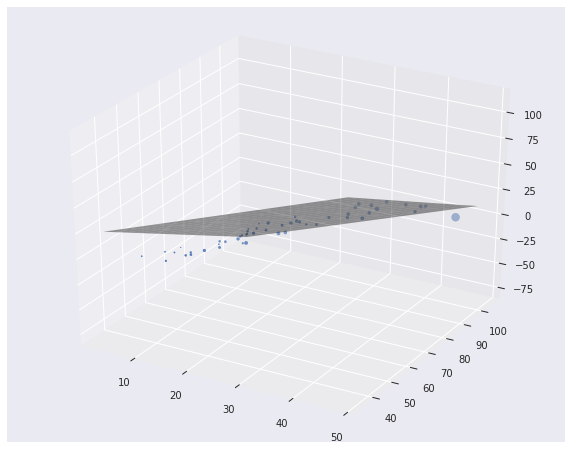

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(df['Brth15to17'].values,df['Brth18to19'].values,df['ViolCrime'].values)
ax.plot_surface(x_surf, y_surf,
                predicted_surface.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)
plt.show()